### Loading the Data

In [1]:
import pandas as pd
train_data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\17. SVM\SVM_SalaryData_Train.csv')
test_data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\17. SVM\SVM_SalaryData_Test.csv')

In [2]:
# merging train_data and test_data
new = pd.concat([train_data,test_data]).reset_index(drop=True)
new

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [49]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  int32 
dtypes: int32(1), int64(5), object(8)
memory usage: 4.7+ MB


### Data Visualization

(Salary                 0     1
 workclass                     
  Federal-gov         857   549
  Local-gov          2185   915
  Private           26055  7251
  Self-emp-inc        734   912
  Self-emp-not-inc   2737  1059
  State-gov          1426   520
  Without-pay          19     2,
 <AxesSubplot:xlabel='workclass'>)

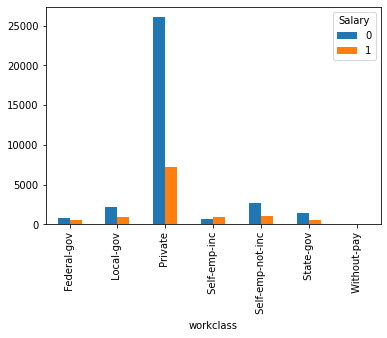

In [50]:
pd.crosstab(new.workclass,new.Salary),pd.crosstab(new.workclass,new.Salary).plot(kind='bar')

(Salary             0     1
 education                 
  10th           1141    82
  11th           1530    89
  12th            534    43
  1st-4th         214     8
  5th-6th         427    22
  7th-8th         768    55
  9th             638    38
  Assoc-acdm     1109   398
  Assoc-voc      1455   504
  Bachelors      4392  3178
  Doctorate       145   399
  HS-grad       12367  2416
  Masters        1121  1393
  Preschool        71     1
  Prof-school     193   592
  Some-college   7908  1990,
 <AxesSubplot:xlabel='education'>)

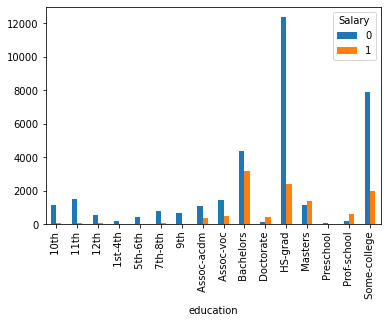

In [51]:
pd.crosstab(new.education,new.Salary),pd.crosstab(new.education,new.Salary).plot(kind='bar')

(Salary                 0     1
 occupation                    
  Adm-clerical       4784   756
  Armed-Forces         10     4
  Craft-repair       4665  1355
  Exec-managerial    3117  2867
  Farming-fishing    1308   172
  Handlers-cleaners  1911   135
  Machine-op-inspct  2604   365
  Other-service      4612   196
  Priv-house-serv     229     3
  Prof-specialty     3304  2704
  Protective-serv     669   307
  Sales              3953  1455
  Tech-support       1009   411
  Transport-moving   1838   478,
 <AxesSubplot:xlabel='occupation'>)

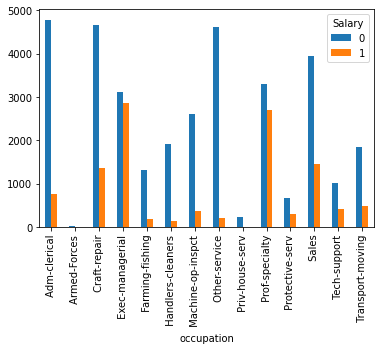

In [52]:
pd.crosstab(new.occupation,new.Salary),pd.crosstab(new.occupation,new.Salary).plot(kind='bar')

(Salary       0     1
 sex                 
  Female  13025  1669
  Male    20988  9539,
 array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object))

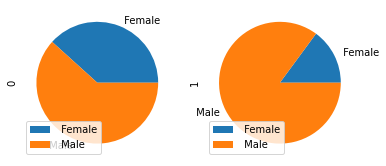

In [54]:
pd.crosstab(new.sex,new.Salary),pd.crosstab(new.sex,new.Salary).plot(kind='pie',subplots=True)

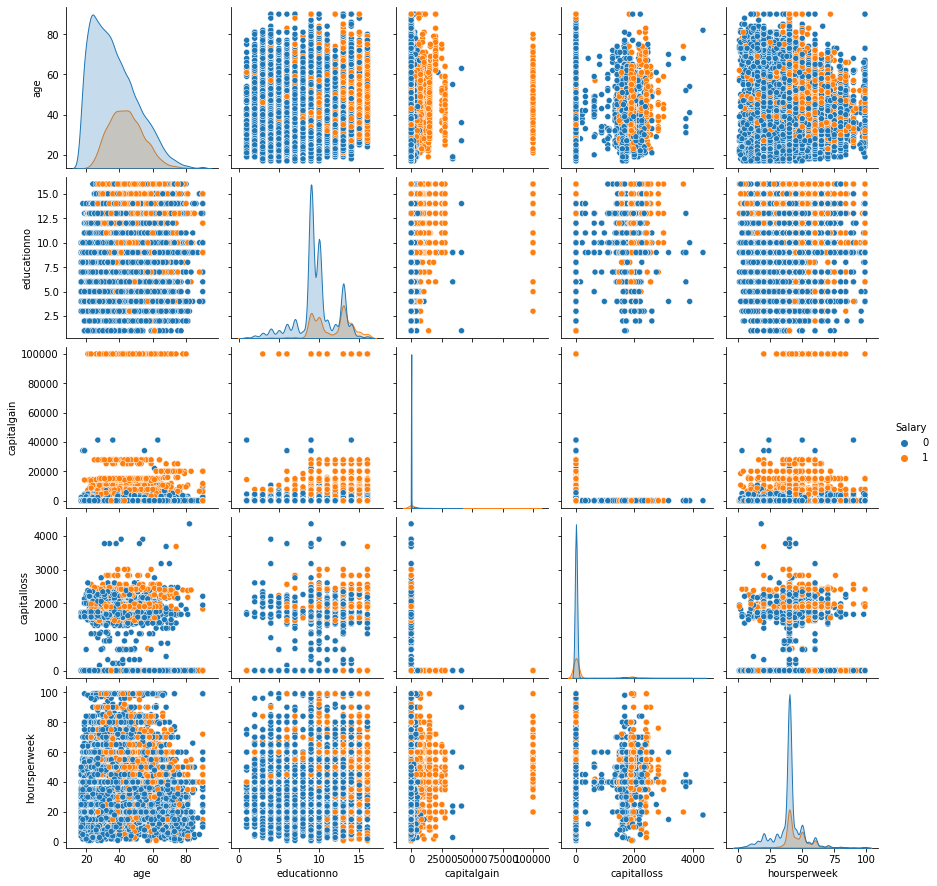

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(new,hue='Salary')
plt.show()

### Data Preprocessing

In [5]:
# Label Encoding of the target
from sklearn.preprocessing import LabelEncoder

new['Salary'] = LabelEncoder().fit_transform(new['Salary'])
new

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [29]:
# One Hot Encoding of the features and seggregating features and target
x = pd.get_dummies(train_data.iloc[:,:-1])
y = train_data['Salary']

### Train Test Split of the Data

In [31]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15,random_state=40)

### Feature Extraction

In [34]:
# Feature Extraction
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_)

[1.71650261e-01 1.23982232e-01 1.18394103e-01 4.23857707e-02
 9.66893986e-02 6.11991565e-03 8.40413290e-03 1.26087399e-02
 6.16841878e-03 1.21410774e-02 5.84167893e-03 0.00000000e+00
 2.93439960e-04 1.19493000e-03 4.46247354e-04 4.37124972e-05
 3.11117741e-04 1.06031938e-03 3.40225343e-04 2.46117733e-03
 3.58893441e-03 3.25523954e-03 2.31714371e-04 3.44024962e-03
 4.15875674e-03 2.23683288e-04 3.21341387e-04 3.39147831e-03
 3.95041537e-03 8.60400227e-04 2.14339310e-01 1.00479266e-03
 3.01311017e-03 1.11190153e-03 1.37106199e-03 5.67867716e-03
 0.00000000e+00 6.96006983e-03 1.13503573e-02 2.85727230e-03
 2.86012552e-03 4.54440420e-03 5.26493014e-03 0.00000000e+00
 9.69406867e-03 2.90844875e-03 9.53494611e-03 6.36169518e-03
 6.86506800e-03 3.11168877e-03 4.06195284e-03 7.90167033e-04
 2.01034542e-03 2.31130583e-03 4.79497445e-03 1.41263434e-03
 2.29338363e-03 5.05862743e-03 9.62150365e-04 8.52322842e-03
 5.20405606e-03 5.75072791e-03 3.64365894e-04 7.72113920e-04
 5.06694802e-04 1.431751

In [35]:
for i in range(0,101):
    if model.feature_importances_[i] > 0.006:
        print(i,model.feature_importances_[i] )

0 0.17165026083674995
1 0.12398223179756473
2 0.11839410275845813
3 0.04238577074587293
4 0.09668939855688197
5 0.006119915645515217
6 0.008404132903299602
7 0.01260873990881667
8 0.006168418780545322
9 0.01214107735309317
30 0.2143393097840563
37 0.006960069829293182
38 0.011350357294700165
44 0.009694068669149354
46 0.00953494611082584
47 0.00636169517997888
48 0.0068650680047933075
59 0.008523228419577167


In [41]:
X_train_f = pd.concat([X_train.iloc[:,0],X_train.iloc[:,1],X_train.iloc[:,2],X_train.iloc[:,3],X_train.iloc[:,4],
                       X_train.iloc[:,5],X_train.iloc[:,6],X_train.iloc[:,7],X_train.iloc[:,9],X_train.iloc[:,10],
                       X_train.iloc[:,30],X_train.iloc[:,37],X_train.iloc[:,38],X_train.iloc[:,44],X_train.iloc[:,46],
                       X_train.iloc[:,47],X_train.iloc[:,48],X_train.iloc[:,59]],axis=1)
Y_train_f = Y_train

### Model Building

In [44]:
# Model
from sklearn.svm import SVC
T = SVC(kernel = 'rbf')
T.fit(X_train_f,Y_train_f)

SVC()

### Model Testing

In [45]:
X_test_f = pd.concat([X_test.iloc[:,0],X_test.iloc[:,1],X_test.iloc[:,2],X_test.iloc[:,3],X_test.iloc[:,4],X_test.iloc[:,5],X_test.iloc[:,6],
                      X_test.iloc[:,7],X_test.iloc[:,9],X_test.iloc[:,10],X_test.iloc[:,30],X_test.iloc[:,37],X_test.iloc[:,38],X_test.iloc[:,44],
                      X_test.iloc[:,46],X_test.iloc[:,47],X_test.iloc[:,48],X_test.iloc[:,59]],axis=1)
Y_test_f = Y_test

In [48]:
# Testing Model
y_pred = T.predict(X_test_f)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test_f, y_pred))
print(classification_report(Y_test_f, y_pred))

[[3344   82]
 [ 800  299]]
              precision    recall  f1-score   support

       <=50K       0.81      0.98      0.88      3426
        >50K       0.78      0.27      0.40      1099

    accuracy                           0.81      4525
   macro avg       0.80      0.62      0.64      4525
weighted avg       0.80      0.81      0.77      4525

